In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
       
train = pd.read_csv('train.csv')



In [2]:
train = train.sample(frac=1)

In [3]:
train[train == 'na'] = np.nan

In [4]:
def norm_to_gauss(df):
    return (df - df.mean()) * 1.0 / (df.var())

In [5]:
data = train.iloc[:, 1:43]

In [6]:
data = data.apply(np.float64)

In [7]:
data = data.apply(norm_to_gauss)

In [8]:
train.head()

,objid,ra,dec,u_0,g_0,r_0,i_0,z_0,clean,rowc,...,g_5,r_5,i_5,z_5,u_6,g_6,r_6,i_6,z_6,class
25550,31664,169.596902,-2.100401,22.65879,20.75751,20.58357,20.46872,20.37497,1,1329.8770,...,0.01011291,0.02271125,0.02895726,-0.182208,3,8,4,8,2,2
6950,90287,22.315833,38.951835,24.30563,24.29673,24.26481,NaN,NaN,0,588.4529,...,-0.8838318000000002,-0.9194126,0.04391661,-0.6404453,6,8,7,4,4,0
2510,86525,108.044347,0.992341,24.46311,23.75562,22.74675,21.465670000000006,20.7689,0,1400.6520,...,NaN,-0.7801894,0.3367852,-0.2187632,3,4,8,5,5,0
19385,97113,173.111355,-0.471983,NaN,17.99716,16.89641,16.44355,16.072129999999998,1,210.5649,...,-0.04073034,-0.05620701,NaN,-0.04972065,3,5,1,3,5,1
24156,96494,146.355873,0.473836,22.05944,20.346870000000006,20.01021,20.1077,19.89886,1,156.5280,...,NaN,-0.03629193,-0.02573661,-0.03997753,3,7,6,5,0,2


In [9]:
import sklearn
from sklearn.impute import SimpleImputer, MICEImputer

In [10]:
scaler = MICEImputer(initial_strategy="most_frequent", verbose=2)

In [54]:
data1 = data.iloc[:, 0:2]

In [57]:
data1.isna() == True

,ra,dec
21426,False,False
24048,False,False
1867,False,False
9685,False,False
5728,False,False
3688,False,False
11805,False,False
28433,False,False
26981,False,False
13192,False,False


In [18]:
data.shape

(30000, 42)

In [11]:
data = scaler.fit_transform(data)

[MICE] Completing matrix with shape (30000, 42)
[MICE] Ending imputation round 1/110, elapsed time 3.58
[MICE] Ending imputation round 2/110, elapsed time 6.81
[MICE] Ending imputation round 3/110, elapsed time 9.87
[MICE] Ending imputation round 4/110, elapsed time 13.25
[MICE] Ending imputation round 5/110, elapsed time 16.97
[MICE] Ending imputation round 6/110, elapsed time 20.45
[MICE] Ending imputation round 7/110, elapsed time 24.39
[MICE] Ending imputation round 8/110, elapsed time 28.20
[MICE] Ending imputation round 9/110, elapsed time 31.57
[MICE] Ending imputation round 10/110, elapsed time 35.00
[MICE] Ending imputation round 11/110, elapsed time 38.52
[MICE] Ending imputation round 12/110, elapsed time 43.12
[MICE] Ending imputation round 13/110, elapsed time 48.76
[MICE] Ending imputation round 14/110, elapsed time 55.44
[MICE] Ending imputation round 15/110, elapsed time 60.56
[MICE] Ending imputation round 16/110, elapsed time 65.02
[MICE] Ending imputation round 17/11

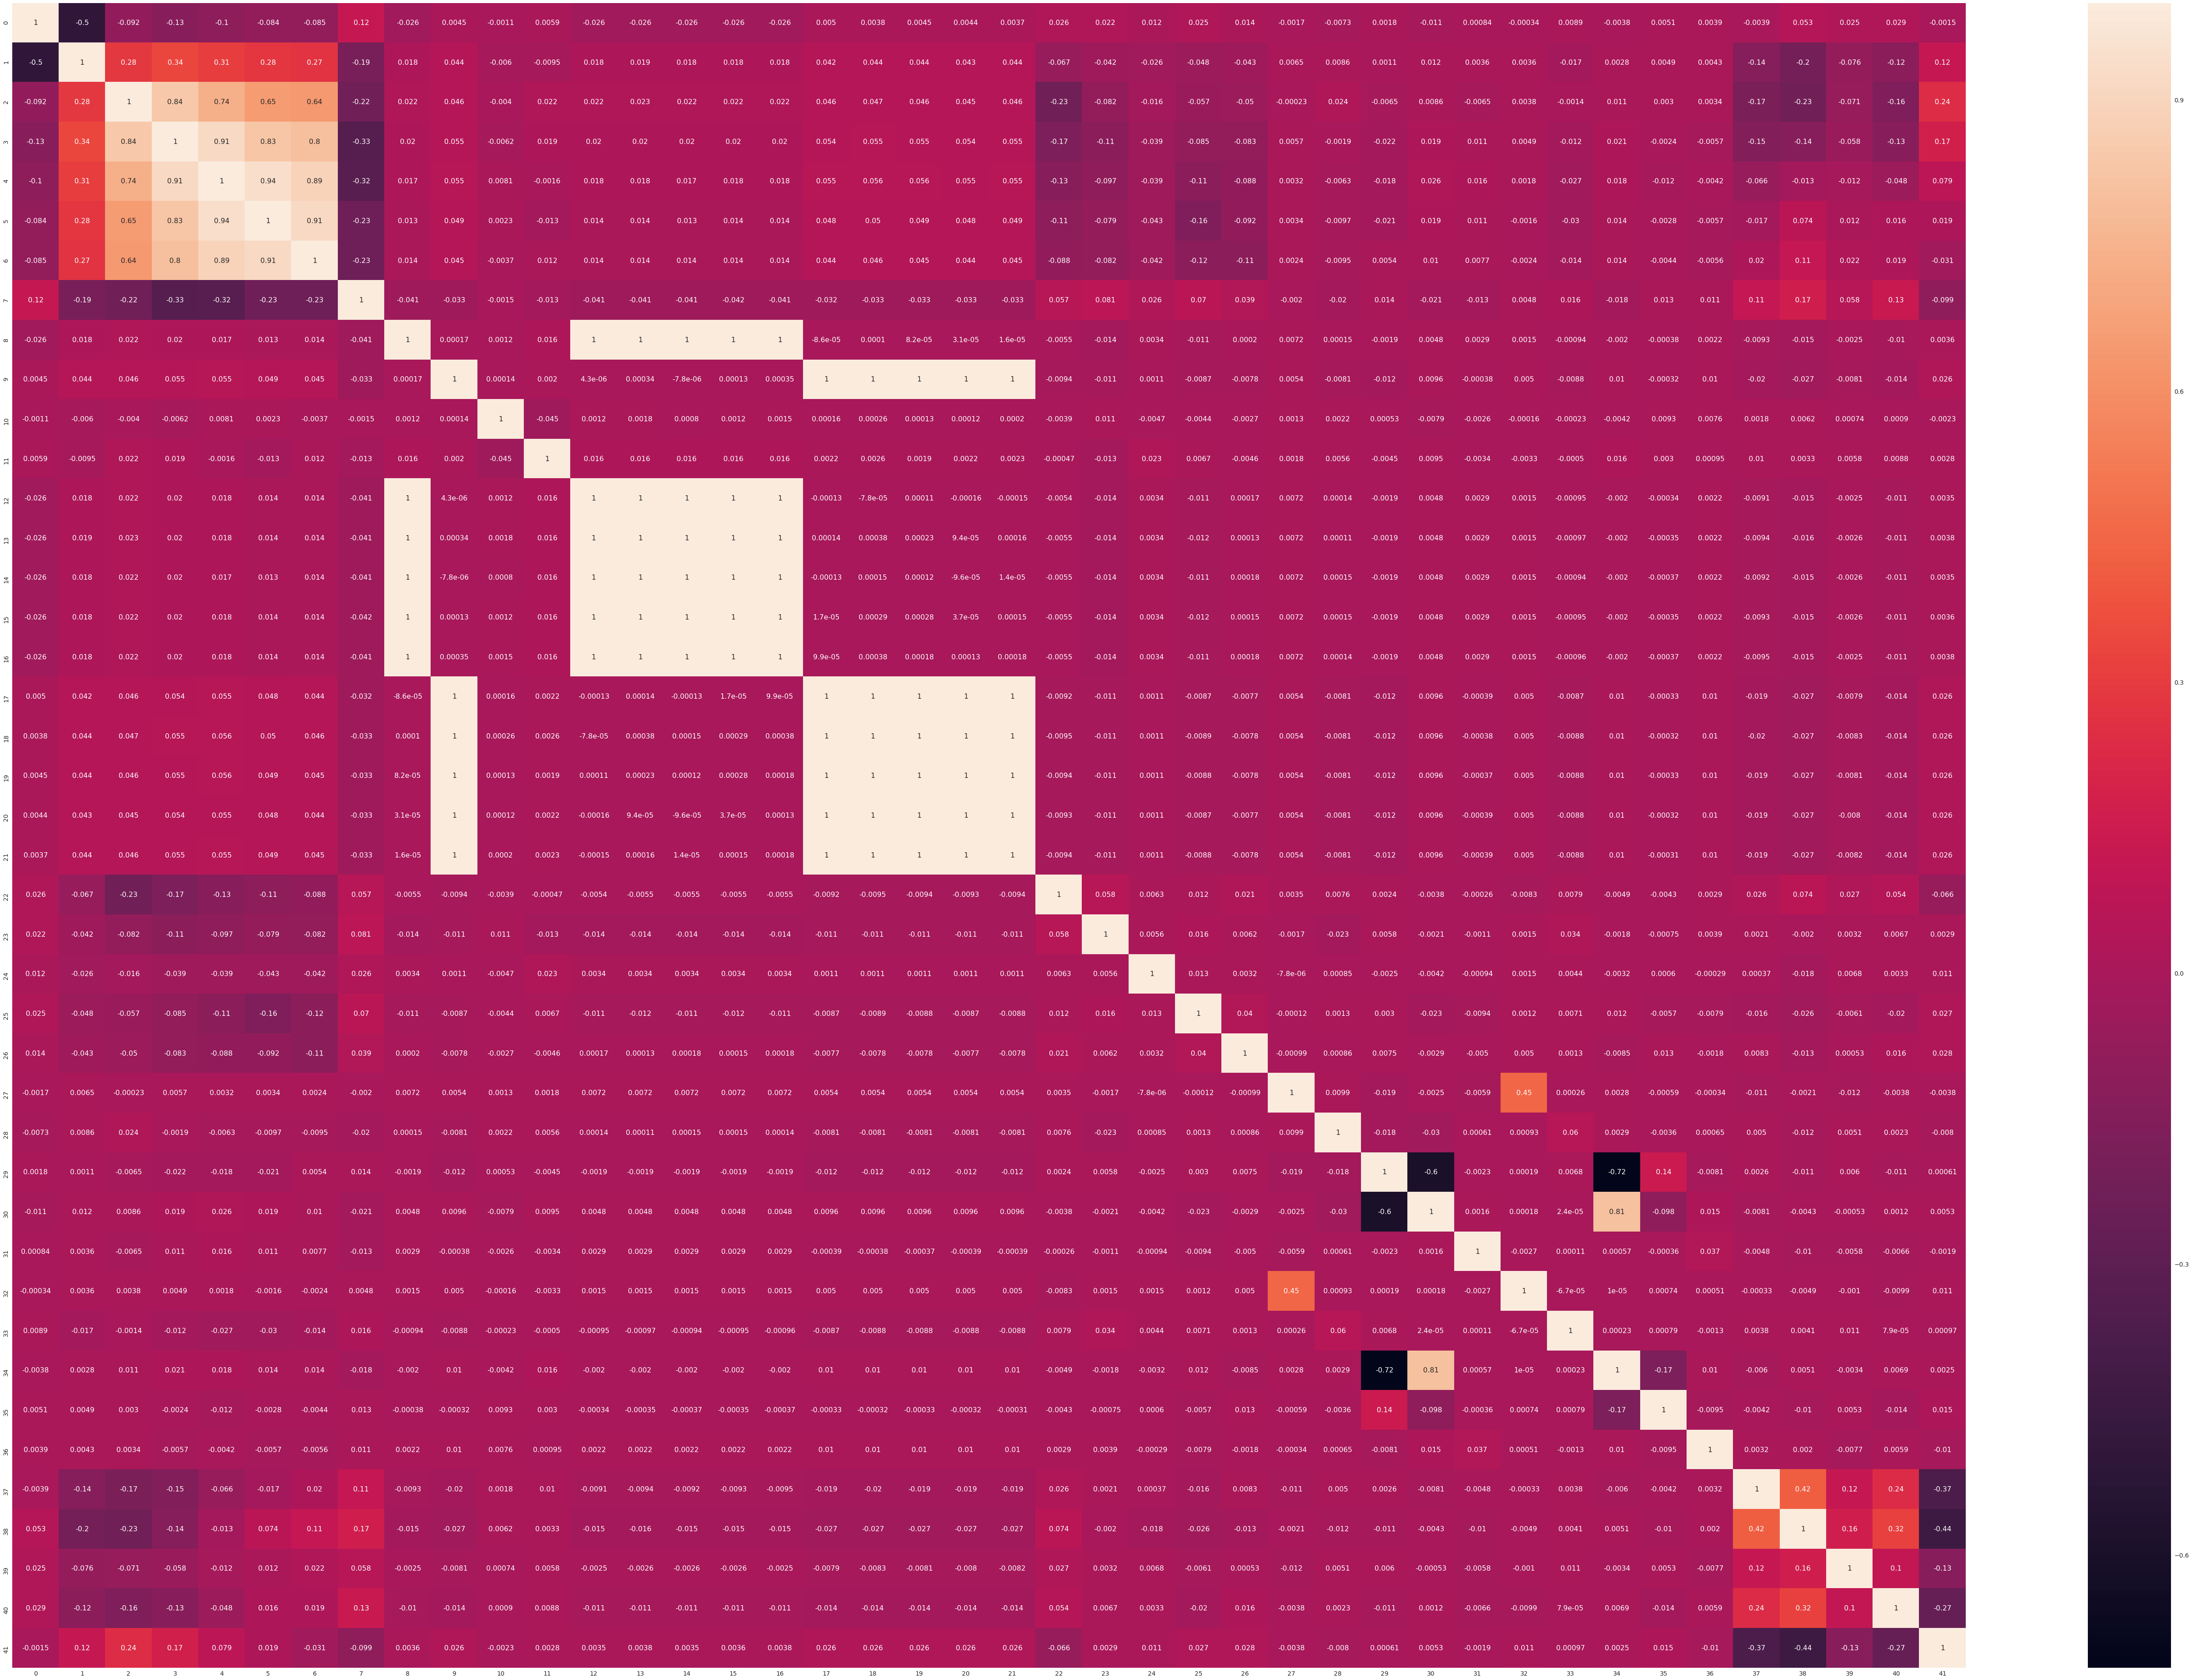

In [26]:

import seaborn as sns
corr = data.corr()
plt.figure(figsize = (100,70))
sns.set(font_scale=1.4)#for label size
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,annot_kws={"size": 16})

In [31]:
corr[corr > 0.25]

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.283609,0.338671,0.305422,0.278179,0.267361,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.283609,1.000000,0.843586,0.735102,0.651483,0.641960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.338671,0.843586,1.000000,0.913385,0.829538,0.801834,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.305422,0.735102,0.913385,1.000000,0.942379,0.886745,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.278179,0.651483,0.829538,0.942379,1.000000,0.913985,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.267361,0.641960,0.801834,0.886745,0.913985,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
y = train.iloc[:,43]

In [63]:
from keras.utils.np_utils import to_categorical   

cl = to_categorical(y, num_classes=3)

In [64]:
cl

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [86]:
data1 = data.iloc[:,0:2]

In [87]:
data1

,ra,dec
21426,-0.018060,-0.091798
24048,0.007189,-0.043732
1867,-0.000632,-0.050626
9685,0.024035,0.062383
5728,-0.026175,0.223135
3688,-0.014553,0.117171
11805,-0.024104,0.050198
28433,0.019460,-0.032629
26981,0.013876,-0.014837
13192,0.007427,-0.029887


In [88]:
data1

,ra,dec
21426,-0.018060,-0.091798
24048,0.007189,-0.043732
1867,-0.000632,-0.050626
9685,0.024035,0.062383
5728,-0.026175,0.223135
3688,-0.014553,0.117171
11805,-0.024104,0.050198
28433,0.019460,-0.032629
26981,0.013876,-0.014837
13192,0.007427,-0.029887


In [91]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()

model.add(Dense(128, init='uniform', input_dim=2, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(64, init='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, init='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(3, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(data1, cl, epochs=150, batch_size=1000)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", input_dim=2, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sig

Epoch 1/150
30000/30000 [==============================] - 1s 35us/step - loss: 0.6905 - acc: 0.6631
Epoch 2/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6804 - acc: 0.6667
Epoch 3/150
30000/30000 [==============================] - 0s 9us/step - loss: 0.6468 - acc: 0.6667
Epoch 4/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6400 - acc: 0.6667
Epoch 5/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6392 - acc: 0.6667
Epoch 6/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6386 - acc: 0.6667
Epoch 7/150
30000/30000 [==============================] - 0s 9us/step - loss: 0.6380 - acc: 0.6667
Epoch 8/150
30000/30000 [==============================] - 0s 9us/step - loss: 0.6371 - acc: 0.6667
Epoch 9/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6345 - acc: 0.6667
Epoch 10/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6178 - acc: 0.673

In [92]:
cv = pd.read_csv('/home/bogan/Загрузки/val.csv')

In [93]:
cv = cv.sample(frac=1)

In [94]:
cv[cv == "na"] = np.nan

In [95]:
data_cv = cv.iloc[:, 1:43]

In [96]:
data_cv = data_cv.apply(np.float32)

In [97]:
data_cv = data_cv.apply(norm_to_gauss)

In [98]:
data_cv1 = data_cv.iloc[:, 0:2]

In [99]:
data_cv1

,ra,dec
11406,-0.009826,0.037819
15640,-0.018625,0.027266
18410,0.027989,-0.063387
13413,-0.004412,-0.048965
3381,-0.000028,0.001174
23142,-0.004791,0.055336
10379,-0.003021,0.014742
6937,0.000209,0.000548
13251,-0.003037,0.014980
7294,0.025224,-0.039630


In [101]:
data_cv1 = scaler.fit_transform(data_cv1)

[MICE] Completing matrix with shape (23333, 2)
[MICE] Ending imputation round 1/110, elapsed time 0.00
[MICE] Ending imputation round 2/110, elapsed time 0.00
[MICE] Ending imputation round 3/110, elapsed time 0.00
[MICE] Ending imputation round 4/110, elapsed time 0.00
[MICE] Ending imputation round 5/110, elapsed time 0.00
[MICE] Ending imputation round 6/110, elapsed time 0.00
[MICE] Ending imputation round 7/110, elapsed time 0.00
[MICE] Ending imputation round 8/110, elapsed time 0.00
[MICE] Ending imputation round 9/110, elapsed time 0.00
[MICE] Ending imputation round 10/110, elapsed time 0.00
[MICE] Ending imputation round 11/110, elapsed time 0.00
[MICE] Ending imputation round 12/110, elapsed time 0.00
[MICE] Ending imputation round 13/110, elapsed time 0.00
[MICE] Ending imputation round 14/110, elapsed time 0.00
[MICE] Ending imputation round 15/110, elapsed time 0.00
[MICE] Ending imputation round 16/110, elapsed time 0.00
[MICE] Ending imputation round 17/110, elapsed tim

In [102]:
true = cv.iloc[:, 43]

In [103]:
predictions = model.predict(data_cv1)

In [104]:
predictions

array([[0.13436535, 0.02065505, 0.8726973 ],
       [0.58633244, 0.10941829, 0.2999977 ],
       [0.07734646, 0.00634942, 0.90742874],
       ...,
       [0.57268745, 0.11142965, 0.3039123 ],
       [0.18260296, 0.2590855 , 0.3736902 ],
       [0.29190233, 0.16178226, 0.39226583]], dtype=float32)

In [105]:
def argmax(preds):
    return np.asarray([np.argmax(line) for line in preds])

In [121]:
predictions = argmax(predictions)

In [122]:
from sklearn.metrics import f1_score

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
true = np.asarray(true)

In [125]:
accuracy_score(true, predictions)

0.21240303432906185

In [126]:
f1_score(true, predictions, average = "macro")

0.17866590839152377

In [119]:
np.unique(true)

array([0, 1, 2])

In [120]:
np.unique(predictions)

array([2.7201171e-38, 2.7617936e-38, 2.8032746e-38, ..., 9.9012345e-01,
       9.9012774e-01, 9.9013340e-01], dtype=float32)